# Import

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Text Preprocessing
import string #
import re # Regular Expression
import pprint # Pretty Print for long texts
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [38]:
# Feature Engineering
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [121]:
# Text Classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [4]:
# Visual
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# File system
import os
# Warning
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [75]:
data = pd.read_csv('CSV_file/text_emotion.csv')
data.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


# Exploratory Data Analysis

## No. of Rows

In [7]:
data.shape

(40000, 4)

## Data Type

In [8]:
# data type
data.dtypes

tweet_id      int64
sentiment    object
author       object
content      object
dtype: object

## Missing data

In [9]:
data.isnull().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

## Keyword

In [10]:
data['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

<AxesSubplot:>

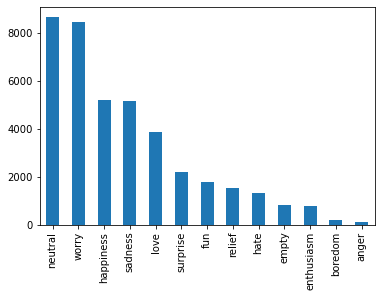

In [11]:
data['sentiment'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='sentiment'>

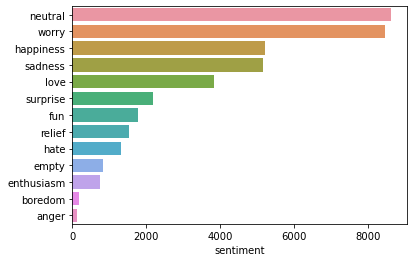

In [12]:
# frequency of sentiment terms
sns.barplot(y=data['sentiment'].value_counts().index, x=data['sentiment'].value_counts())

# Text Data Pre-Processing

## Preprocessor function

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+½', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

def text_preproc(text):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

# data['content'] = data['content'].apply(lambda x: text_preproc(x))
# data['content'][:5]

## Separate Functions

In [60]:
def remove_punctuation(tweets):
    for x in range(len(tweets)):
        word = tweets[x].translate(str.maketrans('', '', string.punctuation))
        tweets[x] = word

remove_punctuation(data['content'])
data['content'].head()
        

0    tiffanylue i know  i was listenin to bad habit...
1    Layin n bed with a headache  ughhhhwaitin on y...
2                        Funeral ceremonygloomy friday
3                  wants to hang out with friends SOON
4    dannycastillo We want to trade with someone wh...
Name: content, dtype: object

In [61]:
def lower_case(tweets):
    for x in range(len(tweets)):
        tweets[x] = tweets[x].lower()
        
lower_case(data['content'])
data['content'].head()

0    tiffanylue i know  i was listenin to bad habit...
1    layin n bed with a headache  ughhhhwaitin on y...
2                        funeral ceremonygloomy friday
3                  wants to hang out with friends soon
4    dannycastillo we want to trade with someone wh...
Name: content, dtype: object

In [76]:
def tokenization_words(tweets):
    for x in range(len(tweets)):
        tweets[x] = tweets[x].lower()  
        tweets[x] = tweets[x].translate(str.maketrans('', '', string.punctuation))
        tweets[x] = tweets[x].split()
        for y in tweets[x]:
            if y in stopwords.words('english'):
                ind = tweets[x].index(y)
                tweets[x].pop(ind)
        tweets[x] = ' '.join(tweets[x])

In [77]:
tokenization_words(data['content'])
data['content'].head()

0    tiffanylue know was listenin bad habit earlier...
1        layin n bed a headache ughhhhwaitin your call
2                        funeral ceremonygloomy friday
3                         wants hang with friends soon
4    dannycastillo want trade someone has houston t...
Name: content, dtype: object

In [ ]:
def removing_stop_words(tweets):
    for x in range(len(tweets)):
        for y in tweets[x]:
            if y in stopwords.words('english'):
                ind = tweets[x].index(y)
                tweets[x].pop(ind)

removing_stop_words(data['content'])
data['content'].head()

In [ ]:
def join_data(tweets):
    for x in range(len(tweets)):
        tweets[x] = ' '.join(tweets[x])

join_data(data['content'])
data['content'].head()

## Emotions list

In [64]:
# Emotions list
emotions = data['sentiment'].unique().tolist()
emotions

['empty',
 'sadness',
 'enthusiasm',
 'neutral',
 'worry',
 'surprise',
 'love',
 'fun',
 'hate',
 'happiness',
 'boredom',
 'relief',
 'anger']

## Anger keywords

In [16]:
# Anger list
anger_list = data[data['sentiment']=='anger']['content']
anger_list.value_counts().sum()

110

In [17]:
anger_list = ' '.join(anger_list)
# anger_list

In [18]:
anger_list.count('dont')

7

In [19]:
def unique_words(text):
    text = text.split()
    dict = {}
    dat = []
    for word in text:
        if word not in dat:
            dat.append(word)
    for i in dat:
        dict[i] = anger_list.count(i)
    return dict
anger_tokens = unique_words(anger_list)
# anger_tokens  
# ({'fuckinm': 1,
#  'transtelecom': 1,)

In [20]:
anger_tokens_sorted = dict(sorted(anger_tokens.items(), key=lambda x:x[1], reverse=True))
# anger_tokens_sorted

## Anger Plot

In [21]:
anger_keys = list(anger_tokens_sorted.keys())
anger_values = list(anger_tokens_sorted.values())

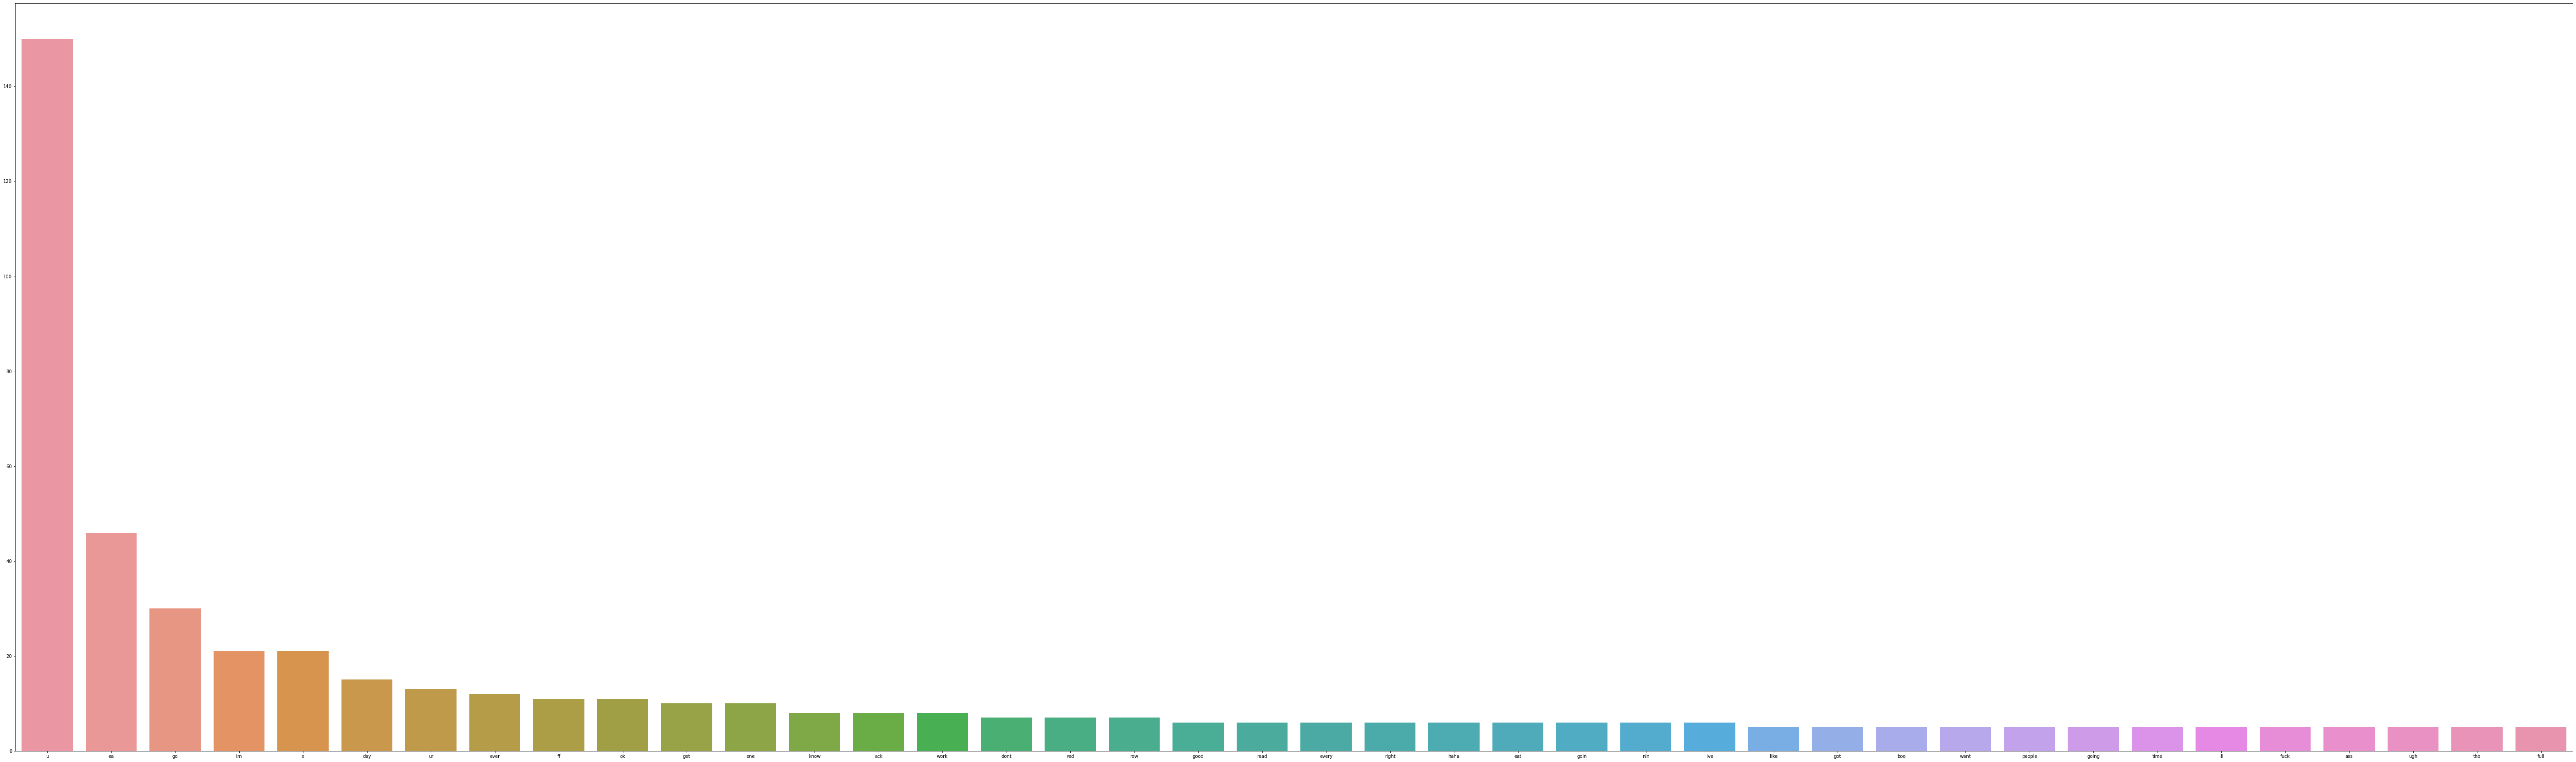

In [23]:
plt.figure(figsize=(100, 30))
sns.barplot(y=anger_values[:40], x=anger_keys[:40])
plt.show()

# Feature Engineering

## Bag of Words (Count Vectorizer)

In [78]:
# Splitting features and labels
x_features = data['content']
y_label = data['sentiment']

In [79]:
count_vectorizer = CountVectorizer()
X_vector = count_vectorizer.fit_transform(x_features) # Fitting vocabolary

In [ ]:
count_vectorizer.get_feature_names()

In [ ]:
print(X_vector.todense()) # if its zero, it means its not repeated, if repeated then need to preserve the space

# Text Classification

## Model Selection

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_vector, y_label, test_size=0.3, random_state=42) # test data 30%

## Naives Bayes

In [83]:
# Score using CounterVectorizer
#classifier: clf_NB
clf_NB = MultinomialNB()
clf_NB.fit(X_train, y_train) # fitting training features and labels

MultinomialNB()

In [126]:
# Scores appened for all classifiers
scores = []
scores.append(clf_NB.score(X_train, y_train)*100)
scores

[57.43214285714286]

In [85]:
y_predict = clf_NB.predict(X_test)
y_predict # all sentimental keyword for the tweets

array(['happiness', 'neutral', 'worry', ..., 'worry', 'worry', 'worry'],
      dtype='<U10')

In [89]:
#Check prediction for known data['content'][5]
check = [data['content'][5]]
vector = count_vectorizer.transform(check).toarray()
print(data['sentiment'][5])
print(clf_NB.predict(vector)) # prediction is accurate

worry
['worry']


In [110]:
# Prediction probability of 13 sentiments
predict_proba = clf_NB.predict_proba(vector)
predict_proba = [item for sublist in predict_proba for item in sublist]
predict_proba

[7.981553327738102e-12,
 4.820539540606276e-10,
 3.072976107390477e-08,
 6.002514300531997e-09,
 2.689358383630433e-05,
 0.003608814054262191,
 4.452617594014114e-05,
 0.0011948114460662337,
 0.013977917173701728,
 3.931924260529328e-06,
 0.04645489821417271,
 2.2041008055750404e-05,
 0.9346661291973942]

In [112]:
# Classes (sentiments) of the Classifier
classes = clf_NB.classes_
# classes = [item for sublist in classes for item in sublist]
classes

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype='<U10')

In [93]:
# Maximum Probability of sentiment [worry] and least is for [anger]
np.max(clf_NB.predict_proba(vector))

0.9346661291973942

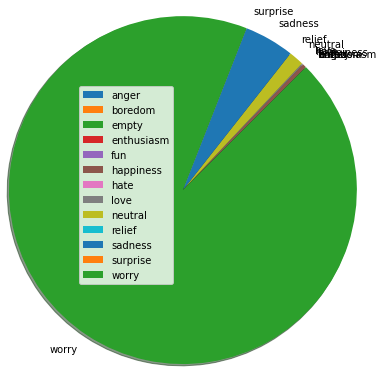

In [116]:
# Plotting classes and probability from the prediciton results 
plt.pie(predict_proba, labels=classes.tolist(), startangle=45, shadow=True, radius=2)
plt.legend()
plt.show()

### Evaluation

In [117]:
# Use sklearn metrics: Classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        33
     boredom       0.00      0.00      0.00        57
       empty       0.14      0.00      0.01       242
  enthusiasm       0.00      0.00      0.00       249
         fun       0.17      0.00      0.00       513
   happiness       0.34      0.29      0.32      1568
        hate       0.40      0.01      0.02       383
        love       0.50      0.31      0.39      1134
     neutral       0.34      0.35      0.35      2620
      relief       0.00      0.00      0.00       515
     sadness       0.29      0.10      0.15      1560
    surprise       0.06      0.00      0.00       625
       worry       0.27      0.73      0.40      2501

    accuracy                           0.31     12000
   macro avg       0.19      0.14      0.13     12000
weighted avg       0.29      0.31      0.26     12000



In [118]:
# Use sklearn metrics: Confusion matrix
print(confusion_matrix(y_test, y_predict))

[[   0    0    0    0    0    2    0    1    7    0    3    0   20]
 [   0    0    0    0    0    2    0    1    9    0    5    0   40]
 [   0    0    1    0    0   16    0    3   90    0    7    1  124]
 [   0    0    0    0    0   30    0    6   78    0    6    0  129]
 [   0    0    0    0    1  104    0   20  126    0   18    0  244]
 [   0    0    0    0    1  460    0  127  374    1   26    3  576]
 [   0    0    1    0    0   12    4    2   54    0   41    1  268]
 [   0    0    0    0    0  200    0  356  181    0   34    0  363]
 [   0    0    3    1    2  220    4   75  924    4   83    7 1297]
 [   0    0    0    0    1   68    0   24  120    0   17    0  285]
 [   0    0    1    0    0   40    0   22  188    0  158    3 1148]
 [   0    0    1    0    1   84    0   23  137    0   18    1  360]
 [   0    0    0    0    0   96    2   49  410    0  123    1 1820]]


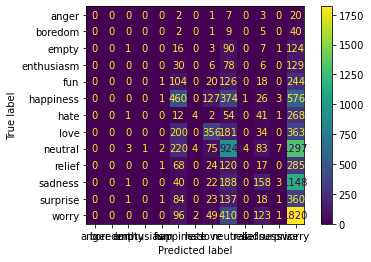

In [119]:
# Plot confusion matrix
plot_confusion_matrix(clf_NB, X_test, y_test)

## Decision Tree

In [122]:
# Score using CounterVectorizer
#classifier: clf_DT
clf_DT = tree.DecisionTreeClassifier(random_state=42, max_depth=400)
clf_DT.fit(X_train, y_train) # fitting training features and labels

DecisionTreeClassifier(max_depth=400, random_state=42)

In [127]:
# Scores[1] appened for DT classifier
scores.append(clf_DT.score(X_train, y_train)*100)
scores

[57.43214285714286, 93.37857142857143]

In [128]:
y_predict = clf_DT.predict(X_test)
y_predict # all sentimental keyword for the tweets

array(['neutral', 'neutral', 'neutral', ..., 'worry', 'worry', 'sadness'],
      dtype=object)

In [130]:
#Check prediction for known data['content'][5]
check = [data['content'][2]]
vector = count_vectorizer.transform(check).toarray()
print(data['sentiment'][2])
print(clf_DT.predict(vector)) # prediction is accurate

sadness
['sadness']


In [131]:
# Prediction probability of 13 sentiments
predict_proba = clf_DT.predict_proba(vector)
predict_proba = [item for sublist in predict_proba for item in sublist]
predict_proba

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]

In [132]:
# Classes (sentiments) of the Classifier
classes = clf_DT.classes_
# classes = [item for sublist in classes for item in sublist]
classes

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

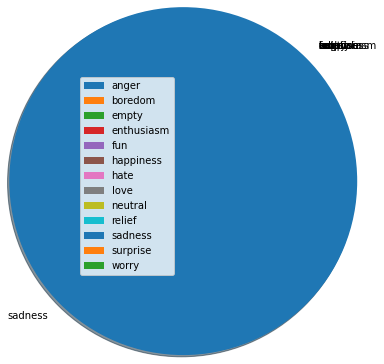

In [133]:
# Plotting classes and probability from the prediciton results 
plt.pie(predict_proba, labels=classes.tolist(), startangle=45, shadow=True, radius=2)
plt.legend()
plt.show()

### Evaluation

In [134]:
# Use sklearn metrics: Classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        33
     boredom       0.00      0.00      0.00        57
       empty       0.01      0.00      0.01       242
  enthusiasm       0.03      0.01      0.01       249
         fun       0.08      0.05      0.07       513
   happiness       0.27      0.32      0.29      1568
        hate       0.23      0.18      0.20       383
        love       0.36      0.31      0.34      1134
     neutral       0.33      0.49      0.40      2620
      relief       0.12      0.06      0.08       515
     sadness       0.26      0.22      0.24      1560
    surprise       0.08      0.05      0.06       625
       worry       0.30      0.31      0.30      2501

    accuracy                           0.28     12000
   macro avg       0.16      0.15      0.15     12000
weighted avg       0.26      0.28      0.27     12000



In [135]:
# Use sklearn metrics: Confusion matrix
print(confusion_matrix(y_test, y_predict))

[[   0    0    0    0    2    1    1    0   12    1    7    5    4]
 [   0    0    1    0    1    6    1    3   22    0    8    1   14]
 [   0    0    1    1    5   26    5   15  109    7   17    5   51]
 [   0    0    0    2   12   44    3   14   86    5   20    9   54]
 [   0    0    1    4   28  126    8   34  151   17   45   11   88]
 [   1    2    7   15   77  494   11  176  390   60   95   53  187]
 [   0    0    3    1    6   20   70   11   96    4   58   13  101]
 [   0    0    5    9   19  251   11  357  229   24   76   37  116]
 [   1   10   15   17   63  285   41  100 1279   37  203   71  498]
 [   0    2    9    5   16  100    3   46  169   32   38   11   84]
 [   1    7   15    5   33  119   53   63  366   24  336   58  480]
 [   0    3    6    4   19  110   14   51  198   10   45   31  134]
 [   1    8   18   12   64  237   80  116  730   55  343   74  763]]


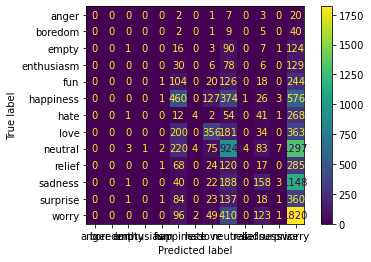

In [136]:
# Plot confusion matrix
plot_confusion_matrix(clf_NB, X_test, y_test)

## Random Forest

### Evaluation

## Linear Regression Model

### Evaluation

## Comparision